# CNN Exercise

## Due: 5/28/20
## 30 points

### Instructions
- The **"MNIST" data set** is composed of 28x28 pixel, black and white images of handwritten digits (0-9). It is commonly used to demonstrate the training and testing of CNNs.
- **We provide you with framework code** to build a CNN of roughly suitable size for the MNIST digit recognition task.


- **Your tasks**:
 - **Execute the train/test code** and observe the results of the gradient descent training.
 - **Modify the model architecture in the following ways**, and repeat the training and testing. Each modification should be made relative to the original network. Do not keep "adding" each modification with each new model (which would lead to a final model having all the modifications below):
   - **Modification 1**: Remove the ReLU activation functions and the max-pooling layers, thereby making the entire network a linear function.
   - **Modification 2**: Increase the size of the model by a factor of 16, roughly.
   - **Modification 3**: Convert the large convolutional model to a large non-convolutional model, with roughly the same number of parameters.
   - **Modification 4**: Train the original baseline model with a larger training data set. 
 - Along the way, **answer the questions in the Jupyter notebook cells**. You can just do this with comments within the cell, for example...
   - ```## Answer 1: The training loss increased when I did x, y, and z.```

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import time

np.random.seed(0)
tf.random.set_seed(0)

import matplotlib.pyplot as plt
%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Set TensorFlow verbosity level

In [2]:
verbose = 1 # 0==no output, 1=accuracy/loss output, 2=progress bar output

## Create helper function to plot results of our model training

In [3]:
def plot_results(history):
    epoch_num = np.arange(1, len(history.history['loss'])+1)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epoch_num, history.history['loss'], label='training_loss')
    plt.plot(epoch_num, history.history['val_loss'], label='test_loss')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epoch_num, history.history['accuracy'], label='training_accuracy')
    plt.plot(epoch_num, history.history['val_accuracy'], label='test_accuracy')
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)

## Load the MNIST data

### You will not need to re-run or re-use (cut/paste) the three code cells below.

The full dataset has 60,000 training images and 10,000 test images.

To accelerate training on jupyterhub (with lots of users) we will only  
use a subset of the training set. This will also let us explore some of the  
hazards of training a neural net without a very large set of samples.

In [4]:
# Load data
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# Use a subset of the full training and test sets for actual training and testing,
# to accelerate training, and demonstrate possible pitfalls of smaller training data sets.

n_train = 1000
images_train = images_train[0:n_train,:,:]
labels_train = labels_train[0:n_train]

n_test = 1000
images_test = images_test[0:n_test,:,:]
labels_test = labels_test[0:n_train]

## We'll show a few of the MNIST digits, to confirm that they look as expected

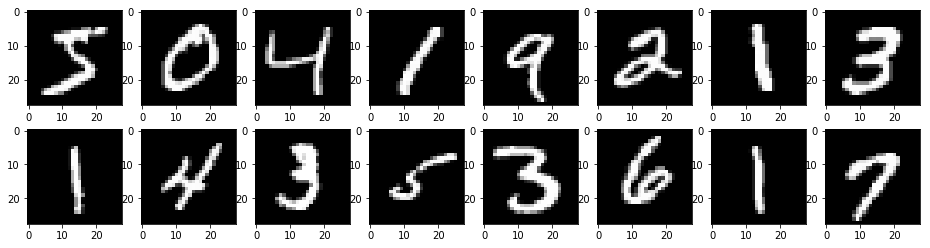

In [5]:
## You will not need to run this cell more than once, or cut/paste it elsewhere
plt.figure(figsize=(8*2, 2*2))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(images_train[i,:,:], cmap='gray')

In [6]:
# Create TensorFlow Dataset objects to hold train and test data.
images_train = images_train/255
images_train = np.expand_dims(images_train, axis=3) # TensorFlow expects a channel dimension
images_train = tf.cast(images_train, tf.float32)
labels_train = tf.cast(labels_train, tf.float32)
dataset_train = tf.data.Dataset.from_tensor_slices((images_train, labels_train))

images_test = images_test/255
images_test = np.expand_dims(images_test, axis=3) # TensorFlow expects a channel dimension
images_test = tf.cast(images_test, tf.float32)
labels_test = tf.cast(labels_test, tf.float32)
dataset_test = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

batch_size = 50

dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(n_train)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

dataset_test = dataset_test.cache()
dataset_test = dataset_test.batch(batch_size)
dataset_test = dataset_test.cache()
dataset_test = dataset_test.prefetch(tf.data.experimental.AUTOTUNE)

## Construct, compile, and train the baseline model.

### Don't edit any code in the cell below.

### Run the cell, and wait for the training to finish. Training may take minute or two.

The code will plot the loss and accuracy scores that were collected during training. Remember that training uses gradient descent, so the model parameters are slowly updated as the model gets a closer and closer fit to the data. TensorFlow records the scores after each "epoch"--the number of iterations at which all samples in the training set have been used once, in the gradient descent process.

Train for 20 steps, validate for 20 steps
Epoch 1/30
20/20 [==============================] - 1s 31ms/step - loss: 2.1958 - accuracy: 0.2710 - val_loss: 2.0795 - val_accuracy: 0.3310
Epoch 2/30
20/20 [==============================] - 0s 12ms/step - loss: 1.8256 - accuracy: 0.4950 - val_loss: 1.5758 - val_accuracy: 0.6170
Epoch 3/30
20/20 [==============================] - 0s 12ms/step - loss: 1.1628 - accuracy: 0.7310 - val_loss: 0.9790 - val_accuracy: 0.7200
Epoch 4/30
20/20 [==============================] - 0s 12ms/step - loss: 0.6917 - accuracy: 0.8090 - val_loss: 0.7255 - val_accuracy: 0.7750
Epoch 5/30
20/20 [==============================] - 0s 13ms/step - loss: 0.5170 - accuracy: 0.8520 - val_loss: 0.5966 - val_accuracy: 0.8190
Epoch 6/30
20/20 [==============================] - 0s 12ms/step - loss: 0.4270 - accuracy: 0.8730 - val_loss: 0.6002 - val_accuracy: 0.8060
Epoch 7/30
20/20 [==============================] - 0s 12ms/step - loss: 0.3836 - accuracy: 0.8890 - val_loss: 0

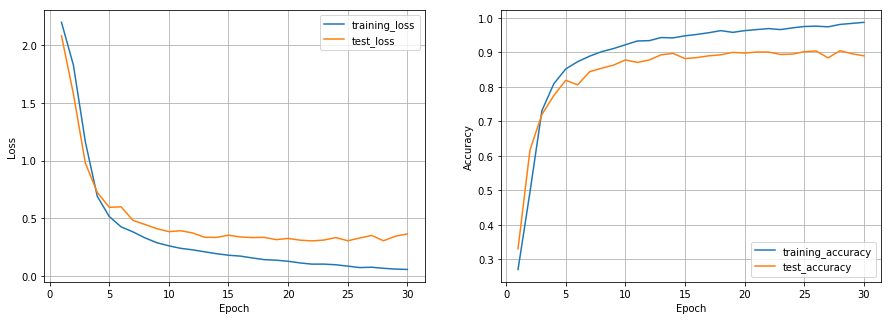

In [7]:
## This is the baseline model. Only modify it after copying it to cells further below.
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

## MODIFICATION 1

### Copy code from cell above, that builds and trains the baseline model, and plots the results.
### Now alter the model as described below, and run the code.
Alter the model by removing the ReLU and max-pooling non-linear activations.  
You can do this by
1. setting ```activation=None``` rather than ```activation='relu'``` in the relevant NN layers, and
2. by commenting out or deleting lines of code that define the max-pooling layers.

Train for 20 steps, validate for 20 steps
Epoch 1/30
20/20 [==============================] - 1s 32ms/step - loss: 1.2052 - accuracy: 0.6390 - val_loss: 0.7833 - val_accuracy: 0.7550
Epoch 2/30
20/20 [==============================] - 0s 15ms/step - loss: 0.4353 - accuracy: 0.8740 - val_loss: 0.5466 - val_accuracy: 0.8240
Epoch 3/30
20/20 [==============================] - 0s 15ms/step - loss: 0.3044 - accuracy: 0.9160 - val_loss: 0.5234 - val_accuracy: 0.8480
Epoch 4/30
20/20 [==============================] - 0s 15ms/step - loss: 0.2171 - accuracy: 0.9440 - val_loss: 0.5261 - val_accuracy: 0.8450
Epoch 5/30
20/20 [==============================] - 0s 15ms/step - loss: 0.1689 - accuracy: 0.9580 - val_loss: 0.5139 - val_accuracy: 0.8460
Epoch 6/30
20/20 [==============================] - 0s 15ms/step - loss: 0.1253 - accuracy: 0.9670 - val_loss: 0.5622 - val_accuracy: 0.8420
Epoch 7/30
20/20 [==============================] - 0s 15ms/step - loss: 0.0883 - accuracy: 0.9830 - val_loss: 0

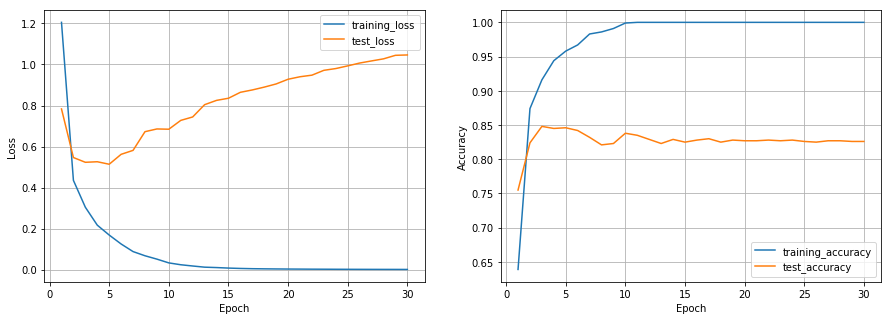

In [8]:
## MODIFICATION 1
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE
## This is the baseline model. Only modify it after copying it to cells further below.
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation=None),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation=None),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(dense_layer_neurons, activation=None),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [9]:
## MODIFICATION 1
## QUESTION 1: During training, how did the loss (error) curves change from the baseline model to the linear (MOD 1)
##             model, for both the training and test sets? What does this imply regarding underfitting or overfitting?
## QUESTION 2: In general, did the ReLU and max-pooling non-linearities make for a better model or a worse model?

## Answer 1: While training was seen to follow the original path in accuracy, we see a major divergence with the test 
# accurace from the training accuracy that continues to diverge as time goes on implying major overfitting of the model
##
## Answer 2: the relu and max-pooling appear to have been a detriment when only looking at the results after a small 
# number of epochs but the results rose quickly with each epoch and in the end they made for more accuracy and overall
# much lower levels of loss
##

## MODIFICATION 2

### Copy code from the baseline model, for building, training, and plotting results.
### Now alter the model as described below, and run the code.

Make the network much larger, by:
1. Increasing the number of kernels in the convolutional layers from 4 to 64 (16x).
2. Increasing the number neurons in the dense layer from 64 to 1024 (16x).

Train for 20 steps, validate for 20 steps
Epoch 1/30
20/20 [==============================] - 1s 72ms/step - loss: 1.2579 - accuracy: 0.5920 - val_loss: 0.7187 - val_accuracy: 0.7900
Epoch 2/30
20/20 [==============================] - 1s 55ms/step - loss: 0.3937 - accuracy: 0.8840 - val_loss: 0.3518 - val_accuracy: 0.8830
Epoch 3/30
20/20 [==============================] - 1s 55ms/step - loss: 0.1971 - accuracy: 0.9530 - val_loss: 0.3229 - val_accuracy: 0.9000
Epoch 4/30
20/20 [==============================] - 1s 55ms/step - loss: 0.1375 - accuracy: 0.9620 - val_loss: 0.2258 - val_accuracy: 0.9240
Epoch 5/30
20/20 [==============================] - 1s 54ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.2226 - val_accuracy: 0.9320
Epoch 6/30
20/20 [==============================] - 1s 54ms/step - loss: 0.0549 - accuracy: 0.9840 - val_loss: 0.2123 - val_accuracy: 0.9320
Epoch 7/30
20/20 [==============================] - 1s 54ms/step - loss: 0.0258 - accuracy: 0.9940 - val_loss: 0

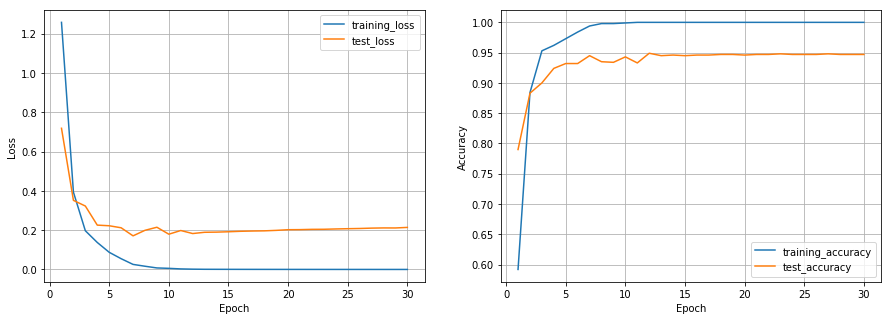

In [10]:
## MODIFICATION 2
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE

num_kernels = 64
dense_layer_neurons = 1024
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [11]:
## MODIFICATION 2
## QUESTION 1: How did the performance of the larger model (MOD 2) compare to that of the baseline model?
## QUESTION 2: Based on the training curves, does the larger model show any **clear** signs of overfitting,
##             despite the large number of parameters?

## Answer 1: This model performed much better than the baseline model in terms of both accuracy and loss
##
## Answer 2: The slight divergence can be seen in the loss even at a low number of epochs which suggests some overfitting
# but nothing tnatwould be overly detrimental to the model so no clear signs.
##

## MODIFICATION 3

### Copy code from the baseline model, for building, training, and plotting results.
### Now alter the model as described below, and run the code.

**Relative to the MOD 2 model**, remove the convolutional and max-pooling layers, replacing them with a single, new, dense layer.

The two convolutional layers have 640 and 36,928 parameters, respectively, for a total of 37,586.
For an input of 28x28 = 784 pixels (features), a dense layer with 48 neurons will have roughly 784x48 = 37,632 parameters. Thus, do the following:
1. Remove the convolutional and max-pooling layers.
2. After the Flatten() layer, add a new Dense layer with 48 neurons and a ReLU activation function.
3. Keep the (now second) Dense layer of dense_layer_neurons==1024 neurons, and the final Dense layer of 10 neurons.

Train for 20 steps, validate for 20 steps
Epoch 1/30
20/20 [==============================] - 0s 19ms/step - loss: 1.7907 - accuracy: 0.5090 - val_loss: 1.1951 - val_accuracy: 0.7040
Epoch 2/30
20/20 [==============================] - 0s 4ms/step - loss: 0.7065 - accuracy: 0.8110 - val_loss: 0.6782 - val_accuracy: 0.7750
Epoch 3/30
20/20 [==============================] - 0s 4ms/step - loss: 0.4269 - accuracy: 0.8710 - val_loss: 0.6047 - val_accuracy: 0.8110
Epoch 4/30
20/20 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.9160 - val_loss: 0.5519 - val_accuracy: 0.8170
Epoch 5/30
20/20 [==============================] - 0s 4ms/step - loss: 0.2429 - accuracy: 0.9290 - val_loss: 0.4649 - val_accuracy: 0.8500
Epoch 6/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9510 - val_loss: 0.5162 - val_accuracy: 0.8470
Epoch 7/30
20/20 [==============================] - 0s 4ms/step - loss: 0.1415 - accuracy: 0.9650 - val_loss: 0.4917 

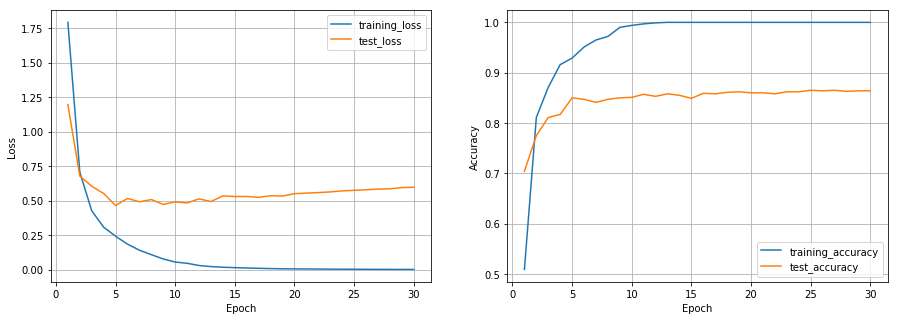

In [12]:
## MODIFICATION 3
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE

num_kernels = 4
dense_layer_neurons = 1024
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
#     tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
#     tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [13]:
## MODIFICATION 3
## QUESTION 1: How did the performance of the large non-convolutional model (MOD 3) compare to that of the
##             large convolutional model (MOD 2)?
## QUESTION 2: Speculate on why the convolutional model performs better or worse than the non-convolutional model.
##             There is a "right" answer, but we're just looking for your opinion/guess. No penalty for error.

## Answer 1: The performance of this model, the nonconvolutional model was far worse than the convolutional model.
##
## Answer 2: For one, there is a lot more overfitting seen in the loss, indicated by the divergence in the training loss, in 
# MOD 3 which could be why this model was much less effective and these greater divergences might be due to the removal of the 
# layers and filters which are characteristic to a  CNN and so rather then applying these filters and gojng through all the image
# hierarchies, the model perhaps found some less distinguishable patterns which were based on unfiltered data and for this 
# reason the model was far less effective
##

## MODIFICATION 4

## This model/data with take longer to train the the previous ones--upwards of several minutes.

### For the modification, we don't modify the model, we modify the size of the data sets. The two cells below create training and testing sets with 10,000 samples each, whereas our previous models used only 1,000 samples each.

### Copy code from the baseline model, for building, training, and plotting results.
- Place the copied code after the two cells below.  
- Run all the cells below to get the new data sets, and train the baseline model on that data.

In [14]:
# Load data
(images_train, labels_train), (images_test, labels_test) = mnist.load_data()

# Use a subset of the full training and test sets for actual training and testing,
# to accelerate training, and demonstrate possible pitfalls of smaller training data sets.

n_train = 10000
images_train = images_train[0:n_train,:,:]
labels_train = labels_train[0:n_train]

n_test = 10000
images_test = images_test[0:n_test,:,:]
labels_test = labels_test[0:n_train]

In [15]:
# Create TensorFlow Dataset objects to hold train and test data.
images_train = images_train/255
images_train = np.expand_dims(images_train, axis=3) # TensorFlow expects a channel dimension
images_train = tf.cast(images_train, tf.float32)
labels_train = tf.cast(labels_train, tf.float32)
dataset_train = tf.data.Dataset.from_tensor_slices((images_train, labels_train))

images_test = images_test/255
images_test = np.expand_dims(images_test, axis=3) # TensorFlow expects a channel dimension
images_test = tf.cast(images_test, tf.float32)
labels_test = tf.cast(labels_test, tf.float32)
dataset_test = tf.data.Dataset.from_tensor_slices((images_test, labels_test))

dataset_train = dataset_train.cache()
dataset_train = dataset_train.shuffle(n_train)
dataset_train = dataset_train.batch(batch_size)
dataset_train = dataset_train.prefetch(tf.data.experimental.AUTOTUNE)

dataset_test = dataset_test.cache()
dataset_test = dataset_test.batch(batch_size)
dataset_test = dataset_test.cache()
dataset_test = dataset_test.prefetch(tf.data.experimental.AUTOTUNE)

Train for 200 steps, validate for 200 steps
Epoch 1/30
200/200 [==============================] - 3s 14ms/step - loss: 0.9870 - accuracy: 0.7031 - val_loss: 0.4444 - val_accuracy: 0.8696
Epoch 2/30
200/200 [==============================] - 2s 12ms/step - loss: 0.3413 - accuracy: 0.9001 - val_loss: 0.3224 - val_accuracy: 0.9022
Epoch 3/30
200/200 [==============================] - 2s 12ms/step - loss: 0.2501 - accuracy: 0.9298 - val_loss: 0.2274 - val_accuracy: 0.9295
Epoch 4/30
200/200 [==============================] - 2s 12ms/step - loss: 0.2042 - accuracy: 0.9401 - val_loss: 0.1835 - val_accuracy: 0.9428
Epoch 5/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1614 - accuracy: 0.9502 - val_loss: 0.1539 - val_accuracy: 0.9527
Epoch 6/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1362 - accuracy: 0.9588 - val_loss: 0.1374 - val_accuracy: 0.9576
Epoch 7/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1192 - accuracy: 0.96

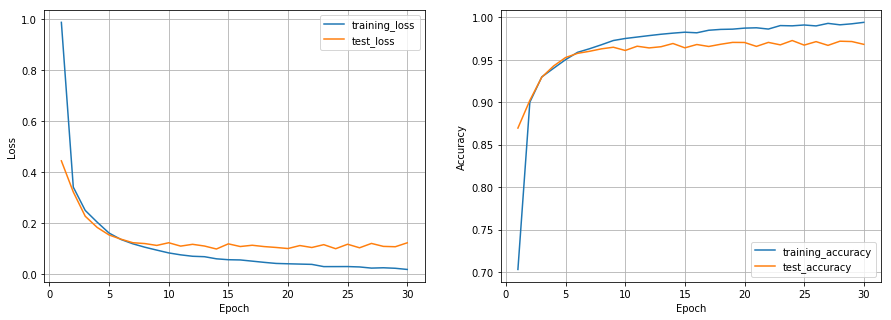

In [16]:
## MODIFICATION 4
## BELOW, PUT YOUR MODEL CONSTRUCTION, COMPILATION, AND FITTING CODE
num_kernels = 4
dense_layer_neurons = 64
kernels_size = (3, 3)
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Conv2D(num_kernels, kernels_size, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='same'),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(dense_layer_neurons, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Do not change any arguments in the call to model.compile()
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Do not change any arguments in the call to model.fit()
epochs = 30
t = time.time()
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_test,
                    verbose=verbose)
print('Training duration: %f seconds.' % (time.time() - t))

# Plot results
plot_results(history)

In [17]:
## MODIFICATION 4
## QUESTION 1: How did the performance of the baseline model trained on the larger data set (MOD 4) compare
##             to that trained on the smaller data set?
## QUESTION 2: This is just guess on your part... how much better do you think results might be if you trained
##             the model on all 60,000 training samples (rather than 1000 or 10,000)?

## Answer 1:The accurancy and the losses of this model were higher and lower respectively then the baseline model however
# it did run much slower
##
## Answer 2: Considering how much more accurate these reasults were, I feel as though it would be logical to say that the more 
# data the better as long as the model isn't too overfitted.
##